# Análise de uma séria temporal

Este notebook analisa dados retirados do Google Trends. A idéia é mostrar alguma sazonalidade na quantidade de pesquisas relacionadas a palavra chave "dieta"

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [113]:
df = pd.read_csv('data.csv')
df.head()

,Data,academias,dieta
0,2004-01,23,71
1,2004-02,18,51
2,2004-03,17,42
3,2004-04,11,40
4,2004-05,13,42


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       220 non-null    object
 1   academias  220 non-null    int64 
 2   dieta      220 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.3+ KB


In [115]:
# Transformando data para o tipo datetime

df.Data = pd.to_datetime(df.Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       220 non-null    datetime64[ns]
 1   academias  220 non-null    int64         
 2   dieta      220 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.3 KB


In [116]:
# Deixando a coluna Data como index do dataframe

df.set_index('Data', inplace=True)


In [117]:
df.head(3)


,academias,dieta
Data,,
2004-01-01,23,71
2004-02-01,18,51
2004-03-01,17,42


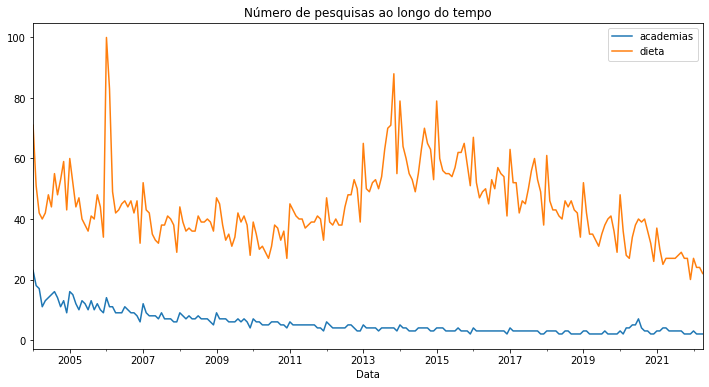

In [118]:
# Plotando a série inteira

df.plot(figsize = (12,6))
plt.title('Número de pesquisas ao longo do tempo')
plt.show()

In [119]:
# Criando um dataframe somente com as pesquisas sobre dieta

df_dieta = pd.DataFrame(df.dieta)
df_dieta.head(3)

,dieta
Data,
2004-01-01,71
2004-02-01,51
2004-03-01,42


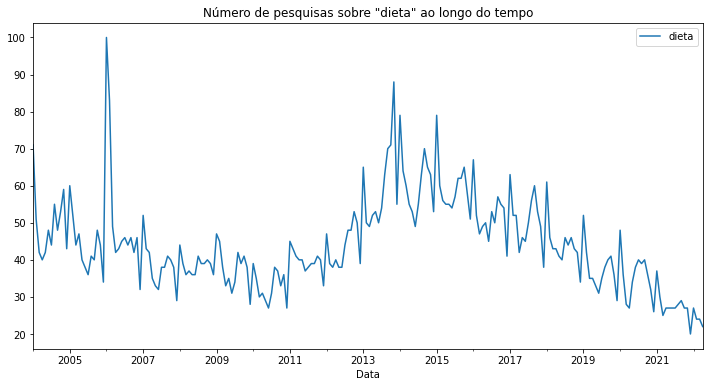

In [120]:
# Checando as tendências

df_dieta.plot(figsize = (12,6))
plt.title('Número de pesquisas sobre "dieta" ao longo do tempo')
plt.show()

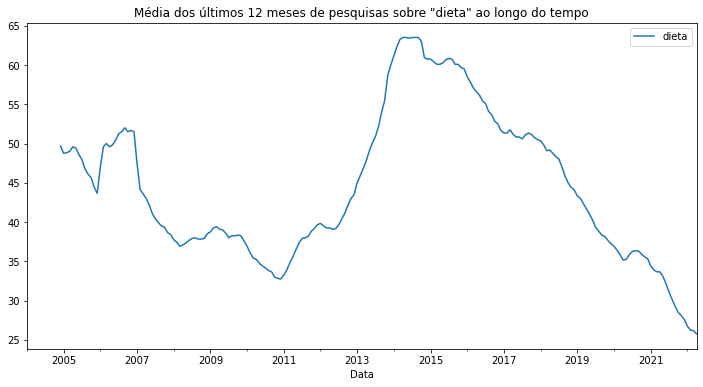

In [121]:
# Aplicando primeiro uma média móvel

df_dieta.rolling(12).mean().plot(figsize=(12, 6))
plt.title('Média dos últimos 12 meses de pesquisas sobre "dieta" ao longo do tempo')
plt.show()


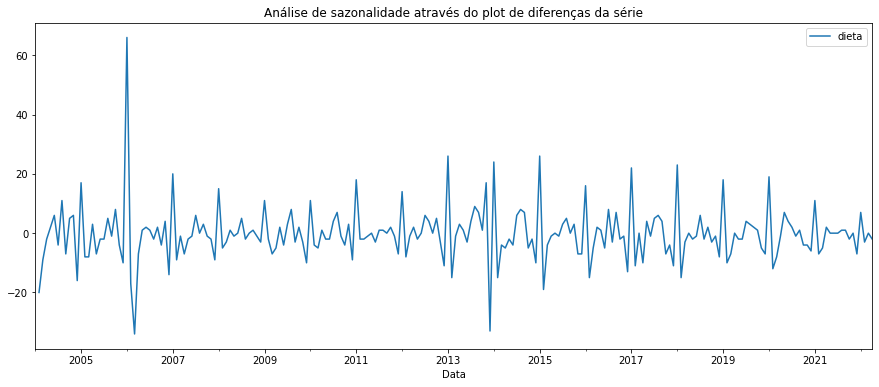

In [122]:
# Checando então a sazonalidade

# Para tanto deve-se eliminar a tendência.  Usa-se um comando do pandas chamado diff para plotar as n diferenças da série

df_dieta.diff(1).plot(figsize=(15, 6))
plt.title('Análise de sazonalidade através do plot de diferenças da série')
plt.show()

# Aqui já se pode perceber picos na quantidade de pesquisas no início de cada ano.

In [123]:
# Plotando com plotly para permitir darmos zoom na análise com facilidade

import plotly.express as px

fig = px.line(df_dieta, x=df_dieta.index, y="dieta", title='Análise da sazonalidade da série')
fig.show()

# Há claramente um pico de pesquisas sobre dieta todos os anos, no início do ano

In [124]:
df_diff = df_dieta.diff(1).groupby(df_dieta.index.month).mean()
tickvalues = df_diff.index
tickvalues


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Data')

In [125]:
import seaborn as sns

ticktext=["Jan", "Fev", "Mar", "Apr","Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

colors = ['magenta','gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray','gray']

my_colors = '#7eb54e'




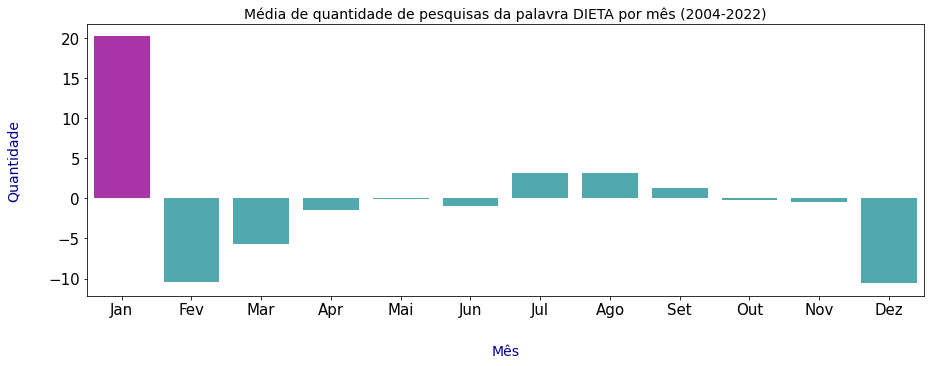

In [126]:
# Grafico da média de pesquisa por mês com o seaborn

plt.figure(figsize=(15,5))
plt.title('Média de quantidade de pesquisas da palavra DIETA por mês (2004-2022)', fontsize = 14)

bar = sns.barplot(x=ticktext, y=df_dieta_mes.dieta, color = '#42b7bd')
bar.set_xlabel("Mês", fontsize = 14, labelpad = 27, color = 'darkblue')
bar.set_ylabel("Quantidade", fontsize = 14, labelpad = 27, color = 'darkblue')
bar.tick_params(labelsize=15)

patch_h = [patch.get_height() for patch in bar.patches]   
# patch_h contains the heights of all the patches now

idx_tallest = np.argmax(patch_h)   
# np.argmax return the index of largest value of the list

bar.patches[idx_tallest].set_facecolor('#a834a8')  


plt.savefig('plot_final.png')


plt.show()


